<h3 style="background-color: #F7F7F7; color: blue; padding: 10px;">
    2d AttId Grid Plots
</h3>


In [19]:

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import pickle
import os
from hom import compute_cube_labels, plot_hom, write_cube_labels

In [20]:
system = 8                  # [1,2,3,4,5,6,7,8,10,11]
num_of_pts = 1000            # [10, 100, 1000, 10000]
num_points_per_dim = 15      # User Choice

In [21]:
path = f'systems/{system}/{num_of_pts}pts/'
path_out = path + str(num_points_per_dim) + 'gppd/'

isExist = os.path.exists(path)
if not(isExist):
    print('The data for this system / number of points does not exist. Run make_data.py to create data.')
else:
    with open(path + 'exp_info.pickle', 'rb') as handle:
        exp_info = pickle.load(handle)
    domain = exp_info['domain']
    print(exp_info)
    print('Number of Boxes = ', (num_points_per_dim-1)**exp_info['dim'])

{'system': 8, 'num_of_pts': 1000, 'domain': ((0, 3.062), (0, 4.072), (0, 11.263620000000001)), 'dim': 3, 'step_size': 1, 'eps': 0.001, 'max_iter': 100, 'norm': False, 'delay': False, 'delay_iter': 4, 'resolution': 0.625873074239563, 'n_components': 4}
Number of Boxes =  2744


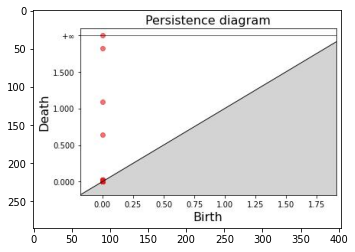

A resolution of 0.625873074239563 was used which yeilded 4 connected components in the graph


In [22]:
if system!=9:
    PD_img = mpimg.imread(path + f'PD.jpg')
    imgplot = plt.imshow(PD_img)
    plt.show()
    print('A resolution of', exp_info['resolution'], 'was used which yeilded', exp_info['n_components'], 'connected components in the graph')

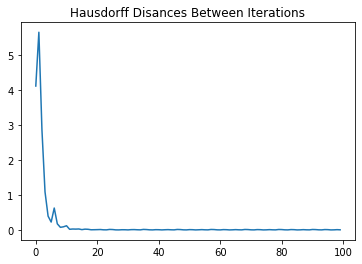

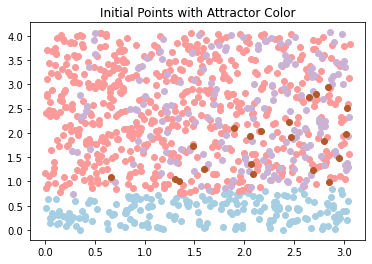

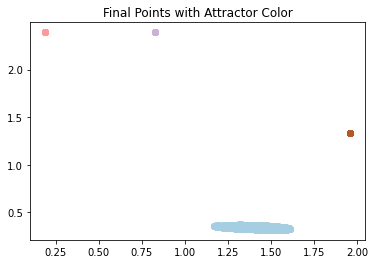

<Figure size 432x288 with 0 Axes>

In [23]:
if system!=9:
     %run plot_data.py {system} {num_of_pts}

Score on test set: 0.9992079207920792
[[2007    1    0    1]
 [   2 6067    1    0]
 [   0    1 1805    2]
 [   0    0    0  213]]


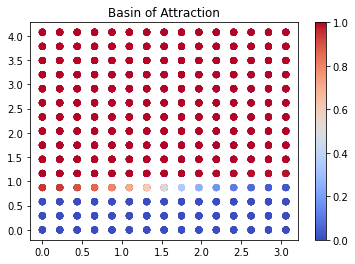

<Figure size 432x288 with 0 Axes>

In [24]:
%run analyze_data.py {system} {num_of_pts} {num_points_per_dim}

In [25]:
data_on_grid=np.loadtxt(path_out + 'data_on_grid.csv', delimiter=',')
df=pd.read_csv(path_out + 'data_on_grid.csv', delimiter=',', header=None)  
#df.describe()     

In [26]:
dim = exp_info['dim']
N = int(num_points_per_dim) 
X = [np.linspace(domain[i][0],domain[i][1],N) for i in range(dim)]

In [27]:
cube_labels = compute_cube_labels(data_on_grid, N, dim)

Box counts for each attractor and the separatrix
[416, 1459, 269, 30, 570, 0]
% of total boxes each attractor and the separatrix
[0.0416 0.1459 0.0269 0.003  0.057  0.    ]


In [28]:
#plot_hom(cube_labels, ((-20, 20), (-20, 20), (5, 5)), N, X)

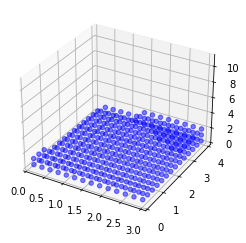

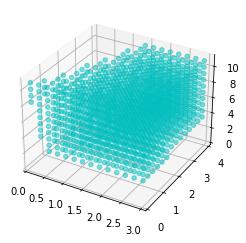

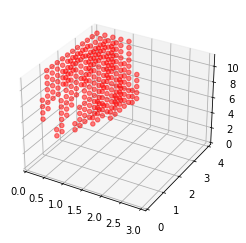

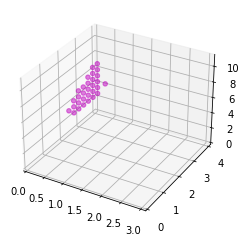

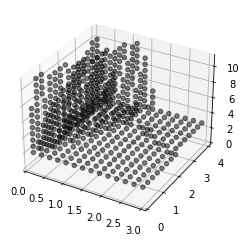

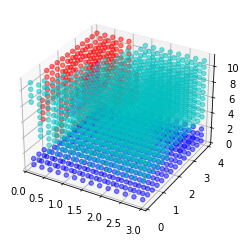

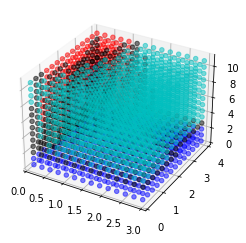

In [29]:
plot_hom(cube_labels, domain, N, X)

In [30]:
write_cube_labels(cube_labels, dim, N, path_out)

In [31]:
!./homcubes {path_out}/att0.txt

HOMCUBES, ver. 3.07, 07/21/10. Copyright (C) 1997-2010 by Pawel Pilarczyk.
This is free software. No warranty. Consult 'license.txt' for details.
Reading cubes to X from 'systems/8/1000pts/15gppd//att0.txt'... 416 cubes read.
50000 bit fields allocated (0 MB) to speed up 3-dimensional reduction.
Reducing full-dim cubes from X... .               37*         415 removed, 1 left.
Transforming X into cells... 1 cells added.
Collapsing faces in X... ... 26 removed, 1 left.
Note: The dimension of X decreased from 3 to 0.
Creating the chain complex of X... Done.
Vertices used: 420 of dim 3.
Time used so far: 0.01 sec (0.000 min).
Computing the homology of X over the ring of integers...
H_0 = Z
Total time used: 0.01 sec (0.000 min).
Thank you for using this software. We appreciate your business.


In [32]:
!./homcubes {path_out}/att1.txt

HOMCUBES, ver. 3.07, 07/21/10. Copyright (C) 1997-2010 by Pawel Pilarczyk.
This is free software. No warranty. Consult 'license.txt' for details.
Reading cubes to X from 'systems/8/1000pts/15gppd//att1.txt'... 1459 cubes read.
50000 bit fields allocated (0 MB) to speed up 3-dimensional reduction.
Reducing full-dim cubes from X... .               3       7      111*         1458 removed, 1 left.
Transforming X into cells... 1 cells added.
Collapsing faces in X... ... 26 removed, 1 left.
Note: The dimension of X decreased from 3 to 0.
Creating the chain complex of X... Done.
Vertices used: 1461 of dim 3.
Time used so far: 0.01 sec (0.000 min).
Computing the homology of X over the ring of integers...
H_0 = Z
Total time used: 0.01 sec (0.000 min).
Thank you for using this software. We appreciate your business.


In [33]:
!./homcubes {path_out}/att2.txt

HOMCUBES, ver. 3.07, 07/21/10. Copyright (C) 1997-2010 by Pawel Pilarczyk.
This is free software. No warranty. Consult 'license.txt' for details.
Reading cubes to X from 'systems/8/1000pts/15gppd//att2.txt'... 269 cubes read.
50000 bit fields allocated (0 MB) to speed up 3-dimensional reduction.
Reducing full-dim cubes from X... .         *         268 removed, 1 left.
Transforming X into cells... 1 cells added.
Collapsing faces in X... ... 26 removed, 1 left.
Note: The dimension of X decreased from 3 to 0.
Creating the chain complex of X... Done.
Vertices used: 273 of dim 3.
Time used so far: 0.00 sec (0.000 min).
Computing the homology of X over the ring of integers...
H_0 = Z
Total time used: 0.00 sec (0.000 min).
Thank you for using this software. We appreciate your business.


In [34]:
!./homcubes {path_out}/att3.txt

HOMCUBES, ver. 3.07, 07/21/10. Copyright (C) 1997-2010 by Pawel Pilarczyk.
This is free software. No warranty. Consult 'license.txt' for details.
Reading cubes to X from 'systems/8/1000pts/15gppd//att3.txt'... 30 cubes read.
50000 bit fields allocated (0 MB) to speed up 3-dimensional reduction.
Reducing full-dim cubes from X... .         *         29 removed, 1 left.
Transforming X into cells... 1 cells added.
Collapsing faces in X... ... 26 removed, 1 left.
Note: The dimension of X decreased from 3 to 0.
Creating the chain complex of X... Done.
Vertices used: 34 of dim 3.
Time used so far: 0.00 sec (0.000 min).
Computing the homology of X over the ring of integers...
H_0 = Z
Total time used: 0.00 sec (0.000 min).
Thank you for using this software. We appreciate your business.


In [35]:
!./homcubes {path_out}/sep.txt

HOMCUBES, ver. 3.07, 07/21/10. Copyright (C) 1997-2010 by Pawel Pilarczyk.
This is free software. No warranty. Consult 'license.txt' for details.
Reading cubes to X from 'systems/8/1000pts/15gppd//sep.txt'... 570 cubes read.
50000 bit fields allocated (0 MB) to speed up 3-dimensional reduction.
Reducing full-dim cubes from X... .               37*         564 removed, 6 left.
Transforming X into cells... 6 cells added.
Collapsing faces in X... ... 112 removed, 32 left.
Note: The dimension of X decreased from 3 to 1.
Creating the chain complex of X... . Done.
Vertices used: 582 of dim 3.
Time used so far: 0.01 sec (0.000 min).
Computing the homology of X over the ring of integers...
Reducing D_1:           0 + 15 reductions made. 
H_0 = Z
H_1 = Z
Total time used: 0.01 sec (0.000 min).
Thank you for using this software. We appreciate your business.


In [36]:
import pychomp2 as pychomp
import os
filenames = []
for file in os.listdir(path_out):
    if file.startswith("att") or file.startswith("sep"):
        filenames.append(os.path.join(path_out, file))

homology = []
for fname in filenames:
    with open(fname) as f:
        lines = f.readlines()
        cubes = [eval(elem) for elem in lines]
        if len(cubes) != 0:
            hom = pychomp.CubicalHomology(cubes)
        else:
            hom = None
        homology.append(hom)
homology = [i for i in homology if i is not None]

In [37]:
print(homology)
with open(path_out + 'homology.txt','w') as hom:
    hom.write(str(homology))

[[1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 1, 0, 0]]
